In [ ]:
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

data = []
for file_ in os.listdir('/content/drive/My Drive/archive'):
    df = pd.read_csv(f"/content/drive/My Drive/archive/{file_}")
    data.append(df)

df = pd.concat(data, axis=0)
df.to_csv('./results.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(10)

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference,fuelType,tax,mpg,engineSize,tax(£)
0,Focus,2016.0,"£8,000",Manual,NaN,Petrol,0.999,"38,852",NaN,NaN,/ad/25451236,NaN,NaN,NaN,NaN,NaN
1,Focus,2019.0,"£13,400",Manual,NaN,Petrol,0.999,"11,952",NaN,NaN,/ad/25466927,NaN,NaN,NaN,NaN,NaN
2,Focus,2019.0,"£14,600",Manual,NaN,Petrol,1.498,"22,142",NaN,NaN,/ad/25484363,NaN,NaN,NaN,NaN,NaN
3,Focus,2016.0,"£9,450",Manual,NaN,Diesel,1.56,"14,549",NaN,NaN,/ad/20444868,NaN,NaN,NaN,NaN,NaN
4,Focus,2015.0,"£9,999",Manual,NaN,Diesel,1.56,"7,010",NaN,NaN,/ad/22551057,NaN,NaN,NaN,NaN,NaN
5,Focus,2016.0,"£10,699",Automatic,NaN,Petrol,999,"26,796",NaN,NaN,/ad/25106166,NaN,NaN,NaN,NaN,NaN
6,Focus,2018.0,"£12,849",Manual,NaN,Petrol,1000,"16,128",NaN,NaN,/ad/25106168,NaN,NaN,NaN,NaN,NaN
7,Focus,2020.0,"£24,999",Manual,NaN,Petrol,2300,"4,900",NaN,NaN,/ad/25139980,NaN,NaN,NaN,NaN,NaN
8,Focus,2018.0,"£11,999",Manual,NaN,Petrol,1498,"30,953",NaN,NaN,/ad/25119452,NaN,NaN,NaN,NaN,NaN
9,Focus,2019.0,"£19,500",Manual,NaN,Diesel,1.5,"3,000",NaN,NaN,/ad/25386987,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.model.value_counts()

model
 Focus      15590
 C Class    11553
 Fiesta      6557
 Golf        4863
 Corsa       3441
            ...  
200             1
 A2             1
 RS7            1
 Accent         1
220             1
Name: count, Length: 195, dtype: int64

<Axes: >

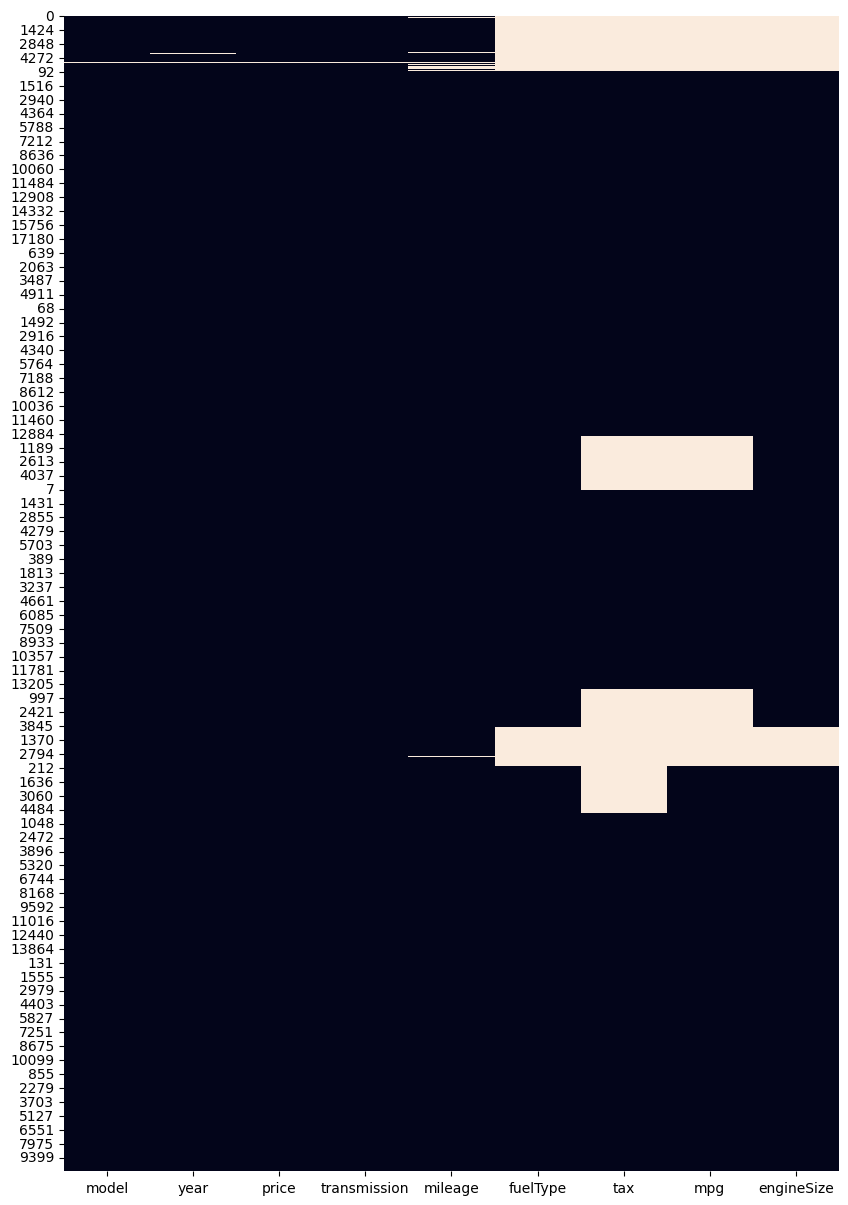

In [ ]:
import seaborn  as sns
from matplotlib.pyplot import figure

figure(figsize = (10, 15))
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.reset_index(inplace=True)
df.dropna(inplace=True)

In [ ]:
df = df.drop(columns = ['fuel type', 'engine size',	'mileage2',	'fuel type2',	'engine size2',	'reference'])

In [ ]:
df

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5604,0,Fiesta,2017.0,12000,Automatic,15944,Petrol,150.0,57.7,1.0
5605,1,Focus,2018.0,14000,Manual,9083,Petrol,150.0,57.7,1.0
5606,2,Focus,2017.0,13000,Manual,12456,Petrol,150.0,57.7,1.0
5607,3,Fiesta,2019.0,17500,Manual,10460,Petrol,145.0,40.3,1.5
5608,4,Fiesta,2019.0,16500,Automatic,1482,Petrol,145.0,48.7,1.0
...,...,...,...,...,...,...,...,...,...,...
118145,10776,X3,2016.0,19000,Automatic,40818,Diesel,150.0,54.3,2.0
118146,10777,5 Series,2016.0,14600,Automatic,42947,Diesel,125.0,60.1,2.0
118147,10778,3 Series,2017.0,13100,Manual,25468,Petrol,200.0,42.8,2.0
118148,10779,1 Series,2014.0,9930,Automatic,45000,Diesel,30.0,64.2,2.0


<Axes: >

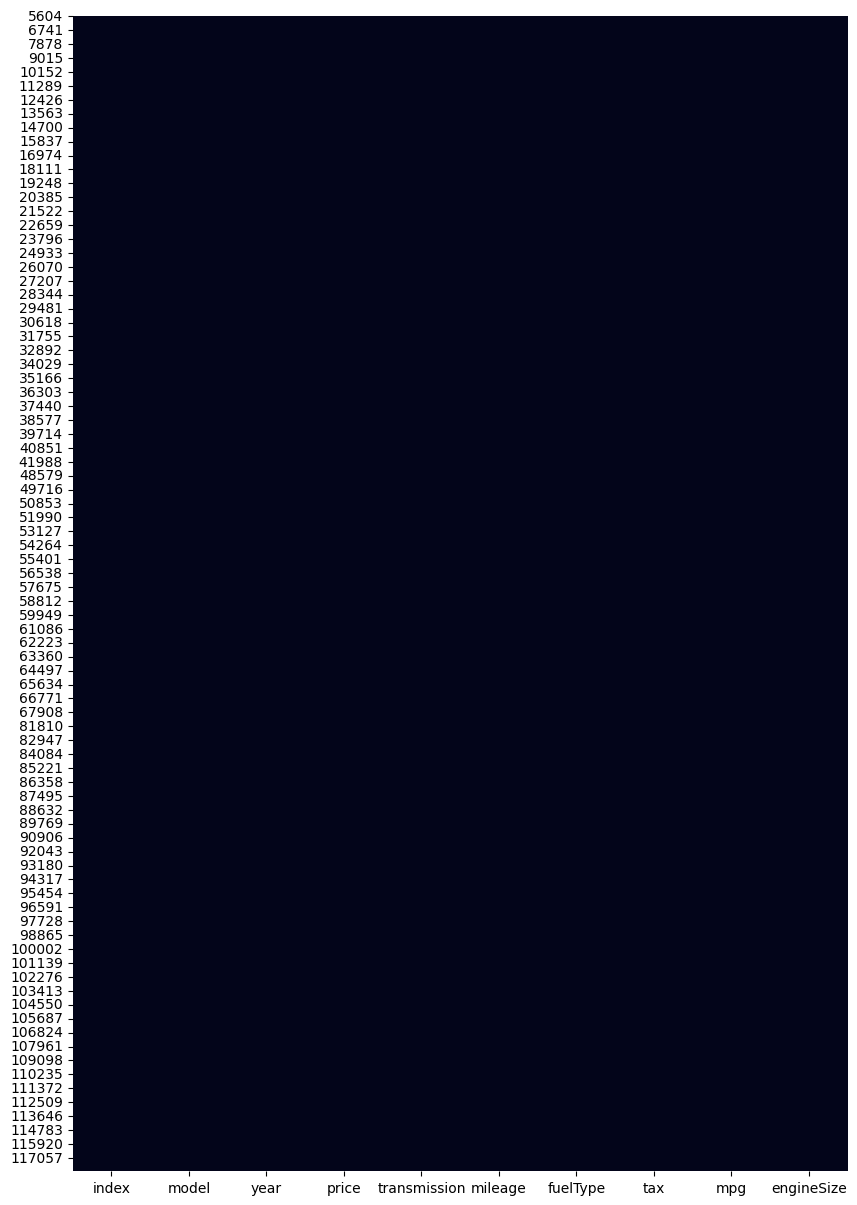

In [ ]:
figure(figsize = (10, 15))
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94327 entries, 5604 to 118149
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         94327 non-null  int64  
 1   model         94327 non-null  object 
 2   year          94327 non-null  float64
 3   price         94327 non-null  object 
 4   transmission  94327 non-null  object 
 5   mileage       94327 non-null  object 
 6   fuelType      94327 non-null  object 
 7   tax           94327 non-null  float64
 8   mpg           94327 non-null  float64
 9   engineSize    94327 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 9.9+ MB


In [ ]:
df.describe()

,index,year,tax,mpg,engineSize
count,94327.000000,94327.000000,94327.000000,94327.000000,94327.000000
mean,6493.545061,2017.086698,120.256183,55.235816,1.673861
std,4268.726453,2.133897,63.404805,16.291667,0.562523
min,0.000000,1970.000000,0.000000,0.300000,0.000000
25%,2947.000000,2016.000000,125.000000,47.100000,1.300000
50%,5895.000000,2017.000000,145.000000,54.300000,1.600000
75%,9623.000000,2019.000000,145.000000,62.800000,2.000000
max,17964.000000,2060.000000,580.000000,470.800000,6.600000


In [ ]:
df.isnull().sum()

index           0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
del df['index']

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'tax'}>],
       [<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'engineSize'}>]], dtype=object)

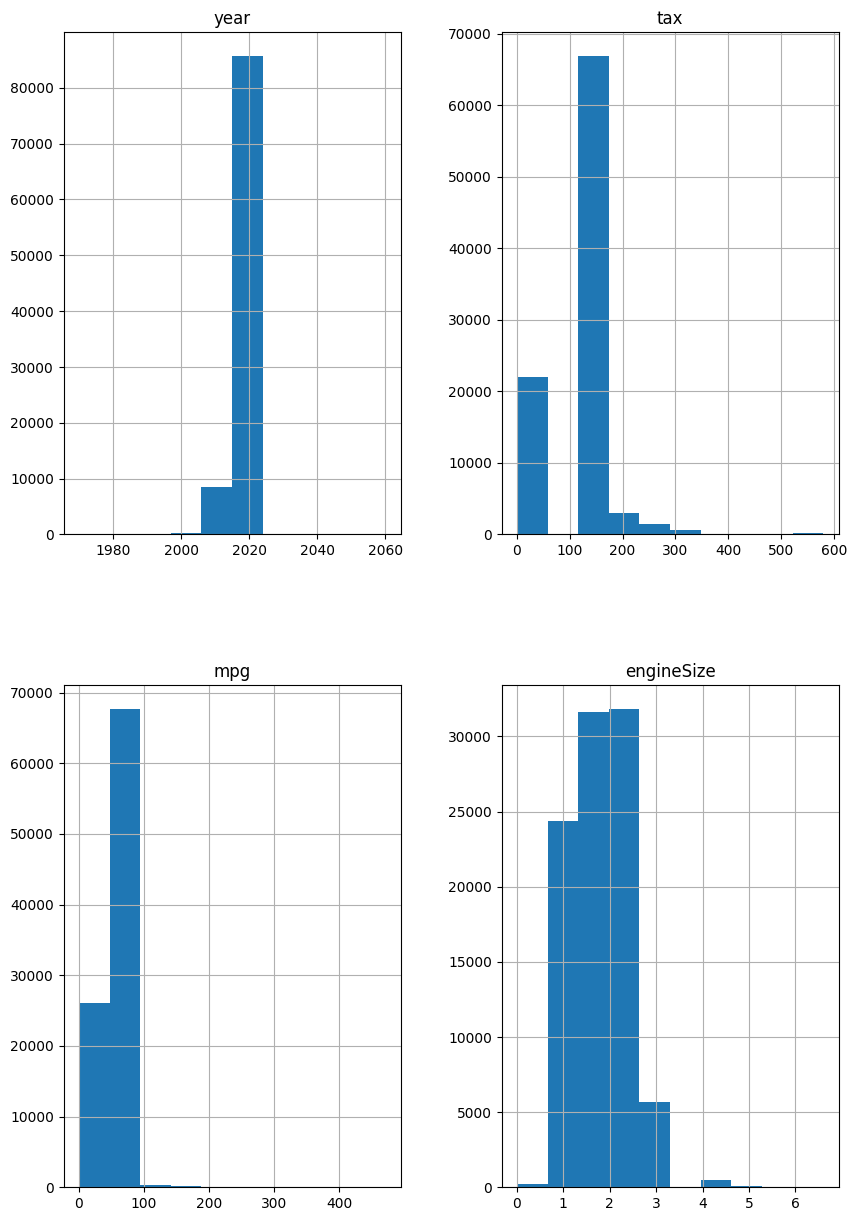

In [ ]:
df.hist(figsize = (10, 15))

In [ ]:
df['model'] = df['model'].apply(lambda x: x.strip())

In [ ]:
df['model'].value_counts()

model
Fiesta             6557
Golf               4863
Focus              4588
C Class            3747
Corsa              3441
                   ... 
200                   1
Transit Tourneo       1
Escort                1
Ranger                1
220                   1
Name: count, Length: 179, dtype: int64

In [ ]:
df.year.describe()

count    94327.000000
mean      2017.086698
std          2.133897
min       1970.000000
25%       2016.000000
50%       2017.000000
75%       2019.000000
max       2060.000000
Name: year, dtype: float64

In [ ]:
df[df['year'] > 2024]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
23330,Fiesta,2060.0,6495,Automatic,54807,Petrol,205.0,42.8,1.4


In [ ]:
df = df[df['year'] < 2024]

In [ ]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5604,Fiesta,2017.0,12000,Automatic,15944,Petrol,150.0,57.7,1.0
5605,Focus,2018.0,14000,Manual,9083,Petrol,150.0,57.7,1.0
5606,Focus,2017.0,13000,Manual,12456,Petrol,150.0,57.7,1.0
5607,Fiesta,2019.0,17500,Manual,10460,Petrol,145.0,40.3,1.5
5608,Fiesta,2019.0,16500,Automatic,1482,Petrol,145.0,48.7,1.0
...,...,...,...,...,...,...,...,...,...
118145,X3,2016.0,19000,Automatic,40818,Diesel,150.0,54.3,2.0
118146,5 Series,2016.0,14600,Automatic,42947,Diesel,125.0,60.1,2.0
118147,3 Series,2017.0,13100,Manual,25468,Petrol,200.0,42.8,2.0
118148,1 Series,2014.0,9930,Automatic,45000,Diesel,30.0,64.2,2.0


In [ ]:
df['price'] = df['price'].astype('int')
df['year'] = df['year'].astype('object')
df['mpg'] = df['mpg'].astype('int')
df['mileage'] = df['mileage'].astype('int')


<ipython-input-23-ecef95d5955e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype('int')
<ipython-input-23-ecef95d5955e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype('object')
<ipython-input-23-ecef95d5955e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [ ]:
from sklearn import preprocessing
import numpy as np

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

# используем все, кроме описания
encoded_data, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки
encoded_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5604,62,22,12000,0,15944,4,150.0,57,1.0
5605,63,23,14000,1,9083,4,150.0,57,1.0
5606,63,22,13000,1,12456,4,150.0,57,1.0
5607,62,24,17500,1,10460,4,145.0,40,1.5
5608,62,24,16500,0,1482,4,145.0,48,1.0
...,...,...,...,...,...,...,...,...,...
118145,165,21,19000,0,40818,0,150.0,54,2.0
118146,8,21,14600,0,42947,0,125.0,60,2.0
118147,6,22,13100,1,25468,4,200.0,42,2.0
118148,0,19,9930,0,45000,0,30.0,64,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94326 entries, 5604 to 118149
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         94326 non-null  object 
 1   year          94326 non-null  object 
 2   price         94326 non-null  int64  
 3   transmission  94326 non-null  object 
 4   mileage       94326 non-null  int64  
 5   fuelType      94326 non-null  object 
 6   tax           94326 non-null  float64
 7   mpg           94326 non-null  int64  
 8   engineSize    94326 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 9.2+ MB


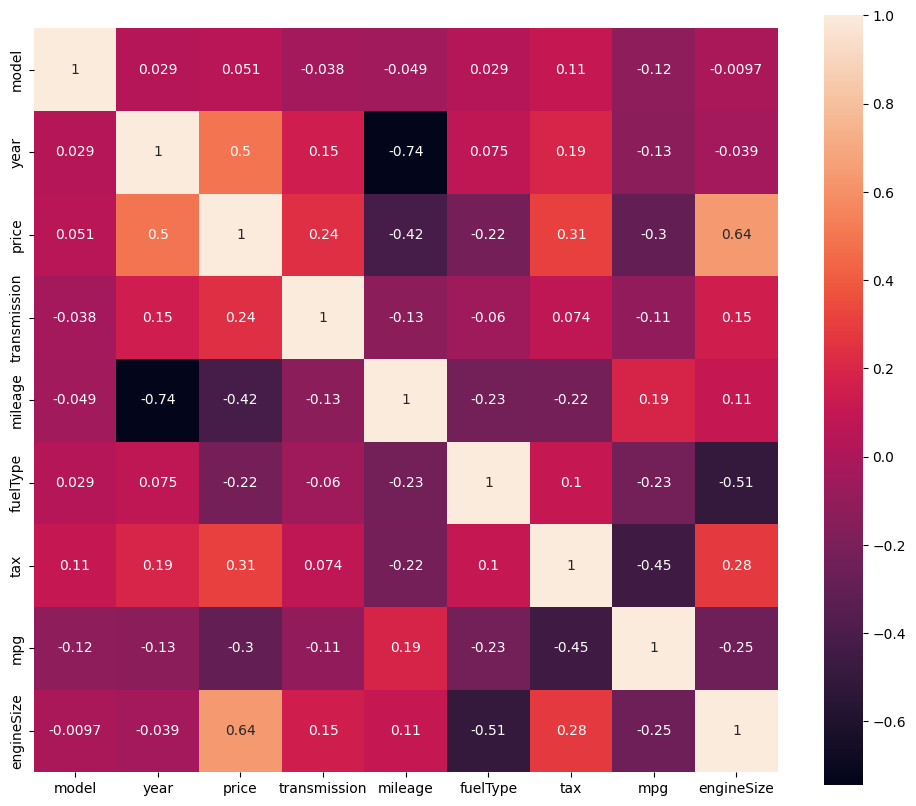

In [ ]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(12, 10))
sns.heatmap(encoded_data.corr(),square = True, annot=True)
plt.show()

In [ ]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017.0,12000,Automatic,15944,Petrol,150.0,57,1.0
1,Focus,2018.0,14000,Manual,9083,Petrol,150.0,57,1.0
2,Focus,2017.0,13000,Manual,12456,Petrol,150.0,57,1.0
3,Fiesta,2019.0,17500,Manual,10460,Petrol,145.0,40,1.5
4,Fiesta,2019.0,16500,Automatic,1482,Petrol,145.0,48,1.0
...,...,...,...,...,...,...,...,...,...
94321,X3,2016.0,19000,Automatic,40818,Diesel,150.0,54,2.0
94322,5 Series,2016.0,14600,Automatic,42947,Diesel,125.0,60,2.0
94323,3 Series,2017.0,13100,Manual,25468,Petrol,200.0,42,2.0
94324,1 Series,2014.0,9930,Automatic,45000,Diesel,30.0,64,2.0


In [ ]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017.0,12000,Automatic,15944,Petrol,150.0,57,1.0
1,Focus,2018.0,14000,Manual,9083,Petrol,150.0,57,1.0
2,Focus,2017.0,13000,Manual,12456,Petrol,150.0,57,1.0
3,Fiesta,2019.0,17500,Manual,10460,Petrol,145.0,40,1.5
4,Fiesta,2019.0,16500,Automatic,1482,Petrol,145.0,48,1.0
...,...,...,...,...,...,...,...,...,...
94321,X3,2016.0,19000,Automatic,40818,Diesel,150.0,54,2.0
94322,5 Series,2016.0,14600,Automatic,42947,Diesel,125.0,60,2.0
94323,3 Series,2017.0,13100,Manual,25468,Petrol,200.0,42,2.0
94324,1 Series,2014.0,9930,Automatic,45000,Diesel,30.0,64,2.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
columns = df[['model', 'transmission', 'fuelType', 'year']]

In [ ]:
columns

,model,transmission,fuelType,year
0,Fiesta,Automatic,Petrol,2017.0
1,Focus,Manual,Petrol,2018.0
2,Focus,Manual,Petrol,2017.0
3,Fiesta,Manual,Petrol,2019.0
4,Fiesta,Automatic,Petrol,2019.0
...,...,...,...,...
94321,X3,Automatic,Diesel,2016.0
94322,5 Series,Automatic,Diesel,2016.0
94323,3 Series,Manual,Petrol,2017.0
94324,1 Series,Automatic,Diesel,2014.0


In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(columns)
codes = enc.transform(columns).toarray()
feature_names = enc.get_feature_names_out(columns.columns)
data_onehot = pd.concat([df[['price', 'mileage','tax', 'mpg', 'engineSize']],
                         pd.DataFrame(codes, columns = feature_names)], axis=1)

In [ ]:
data_onehot

,price,mileage,tax,mpg,engineSize,model_1 Series,model_180,model_2 Series,model_200,model_220,...,year_2011.0,year_2012.0,year_2013.0,year_2014.0,year_2015.0,year_2016.0,year_2017.0,year_2018.0,year_2019.0,year_2020.0
0,12000,15944,150.0,57,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,14000,9083,150.0,57,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,13000,12456,150.0,57,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,17500,10460,145.0,40,1.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,16500,1482,145.0,48,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94321,19000,40818,150.0,54,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
94322,14600,42947,125.0,60,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
94323,13100,25468,200.0,42,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94324,9930,45000,30.0,64,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_onehot.isna().sum()

price          0
mileage        0
tax            0
mpg            0
engineSize     0
              ..
year_2016.0    0
year_2017.0    0
year_2018.0    0
year_2019.0    0
year_2020.0    0
Length: 219, dtype: int64

In [ ]:
df.shape

(94326, 9)

In [ ]:
data_onehot.head()

,price,mileage,tax,mpg,engineSize,model_1 Series,model_180,model_2 Series,model_200,model_220,...,year_2011.0,year_2012.0,year_2013.0,year_2014.0,year_2015.0,year_2016.0,year_2017.0,year_2018.0,year_2019.0,year_2020.0
0,12000,15944,150.0,57,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,14000,9083,150.0,57,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,13000,12456,150.0,57,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,17500,10460,145.0,40,1.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,16500,1482,145.0,48,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
one_hot_feature_names = data_onehot.columns.values
one_hot_feature_names

array(['price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_1 Series',
       'model_180', 'model_2 Series', 'model_200', 'model_220',
       'model_230', 'model_3 Series', 'model_4 Series', 'model_5 Series',
       'model_6 Series', 'model_7 Series', 'model_8 Series',
       'model_A Class', 'model_A1', 'model_A2', 'model_A3', 'model_A4',
       'model_A5', 'model_A6', 'model_A7', 'model_A8', 'model_Adam',
       'model_Agila', 'model_Amarok', 'model_Ampera', 'model_Antara',
       'model_Arteon', 'model_Astra', 'model_Auris', 'model_Avensis',
       'model_Aygo', 'model_B Class', 'model_B-MAX', 'model_Beetle',
       'model_C Class', 'model_C-HR', 'model_C-MAX', 'model_CC',
       'model_CL Class', 'model_CLA Class', 'model_CLC Class',
       'model_CLK', 'model_CLS Class', 'model_Caddy', 'model_Caddy Life',
       'model_Caddy Maxi', 'model_Caddy Maxi Life', 'model_California',
       'model_Camry', 'model_Caravelle', 'model_Cascada', 'model_Citigo',
       'model_Combo Life', 'mo

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_onehot.drop(columns=['price']), data_onehot['price'], test_size=0.2)

In [ ]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(encoded_data.drop(columns=['price']), encoded_data['price'], test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, median_absolute_error

alg = DecisionTreeRegressor()
alg.fit(X_train, y_train)
preds = alg.predict(X_test)

f'r2 = {r2_score(y_test, preds):.2f} MedAE = {median_absolute_error(y_test, preds):.2f}'

'r2 = 0.93 MedAE = 984.50'

In [ ]:
y_train.std()

9954.965628074415

In [ ]:
def plot_feature_importances(gs, column_names, top_n = 15):
    imp = pd.Series(gs.feature_importances_, index = column_names).sort_values(ascending=False)
    plt.figure(figsize=(10, 10))
    plt.title('Важность признаков по Giny Impurity')
    sns.barplot(x = imp.values[:top_n], y = imp.index.values[:top_n], orient='h')

In [ ]:
one_hot_feature_names[:5]

array(['price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype=object)

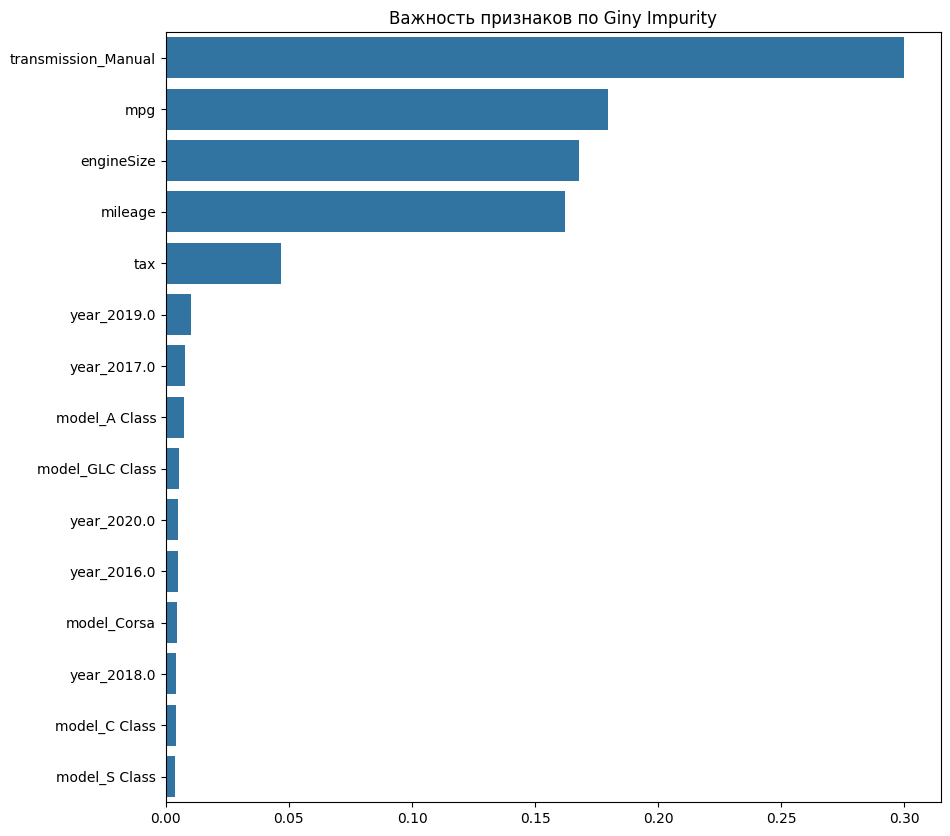

In [ ]:
plot_feature_importances(alg, one_hot_feature_names[1:])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, median_absolute_error

alg = DecisionTreeRegressor()
alg.fit(X_train_, y_train_)
preds = alg.predict(X_test_)

f'r2 = {r2_score(y_test_, preds):.2f} MedAE = {median_absolute_error(y_test_, preds):.2f}'

'r2 = 0.92 MedAE = 959.00'

In [1]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
x1 = [0, 0, 0, 1, 1, 1, 2, 2, 2]
x2 = [0, 1, 2, 0, 1, 2, 0, 1 ,2]
y = [0, 1, 0, 1, 0, 1, 0, 1, 0]

In [4]:
x = list(zip(x1, x2))

In [5]:
x

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, median_absolute_error

alg = DecisionTreeRegressor(max_depth = 4)
alg.fit(x, y)
preds = alg.predict(x)

f'r2 = {r2_score(y, preds):.2f} MedAE = {median_absolute_error(y, preds):.2f}'

'r2 = 1.00 MedAE = 0.00'

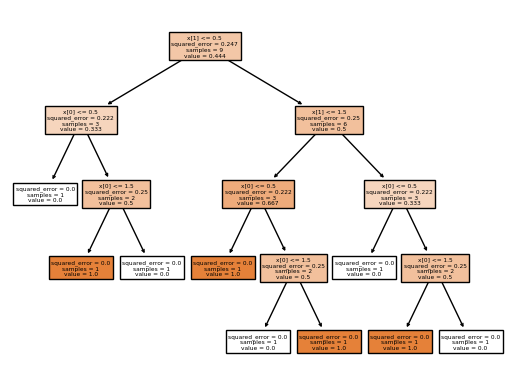

In [7]:
from sklearn import tree
import matplotlib.pyplot as plt

tree.plot_tree(alg, filled=True)

plt.show()